# HW9

### Author: Joseph Wong

## Import Packages and the Data Set

In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# Datetime packages
from datetime import datetime

In [2]:
df = pd.read_csv('data/opsd_germany_daily.csv', parse_dates = True, index_col=0)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


## Data Basics and Preparation


### Variables

In [3]:
df.shape

(4383, 4)

There are 4383 observations and 4 variables.

In [4]:
df.index.name

'Date'

In [5]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

**Index**
The data set is indexed by date (yyyy-mm-dd format).

**Variables**
Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:
- Consumption (float): Electricity consumption in GWh
- Wind (float): Wind power production in GWh
- Solar (float): Solar power production in GWh
- Wind+Solar (float): Sum of wind and solar power production in GWh

In [6]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


The median consumption is 1367.123 GWh while the median production of wind+solar is 240.991. This suggests there are other electricity production sources that are included in the consumption, but not included as production values in the data set. Although one might think the statistics of wind+solar would be the sum of the statistics of wind and solar, it is not (i.e. max wind+solar =/= max wind + max solar). The statistics of wind+solar are based on data collected daily, so statistics like min and max represent a specific day's value, not a summary of the wind and solar columns. In the data set, it appears that wind produces more GWh daily compared to solar (median of 119.0098 vs 86.407 and mean of 164.814173 vs 89.258695 respectively).

### NaNs

In [7]:
df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

Among the columns, consumption has 0 NaNs, wind has 1463, solar has 2195, and wind+solar has 2196. Any analysis we perform should take this into consideration because more than half of the observations in solar and wind+solar are NaNs. This could potential affect the outcome of the analysis.

## Date Range and Frequency

In [8]:
pd.infer_freq(df.index)

'D'

In [9]:
df.index.min()

Timestamp('2006-01-01 00:00:00')

In [10]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [11]:
df.index.value_counts().value_counts()

count
1    4383
Name: count, dtype: int64

The data set contains dates from January 1, 2006 to December 31, 2017. Each observation represents one day. There are 4383 observations which means there are 12 years and 3 days represented (accounts for additional leap year days).

### Add Columns: Year, Month, and Weekday Name (and Season)

In [12]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.strftime("%a")

In [13]:
def toSeason(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# create 'Season' col that is result of applying toSeason to each value in 'Month' col
df['Season'] = df['Month'].apply(toSeason)

## Data Exploration - Basic Visualization

### Overall Consumption Over Time

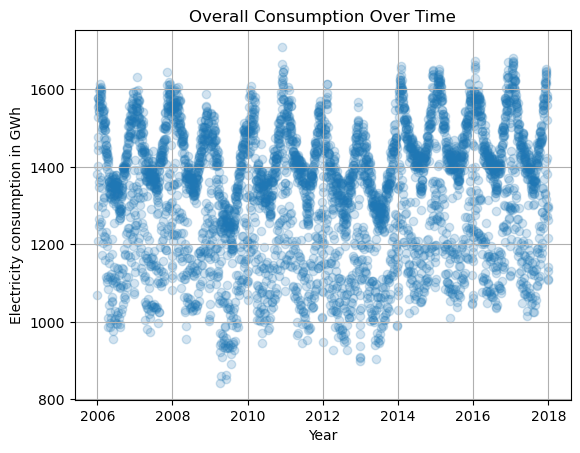

In [14]:
x = df.index
y = df['Consumption']
plt.scatter(x,y,alpha=.2)
plt.grid()
plt.title("Overall Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Electricity consumption in GWh")
plt.show()

The graph displays the overall electricity consumption (in GWh) from the start of 2006 to the end of 2017. There appears to be peaks of consumption where the year changes (i.e. the end of 2007 to the start of 2008). There also appears to be valleys of consumption around the center of each year (i.e. halfway between 2006 and 2007). Although slight, there appears to be an increase in electricity consumption over time.

### Wind and Solar Production Over Time

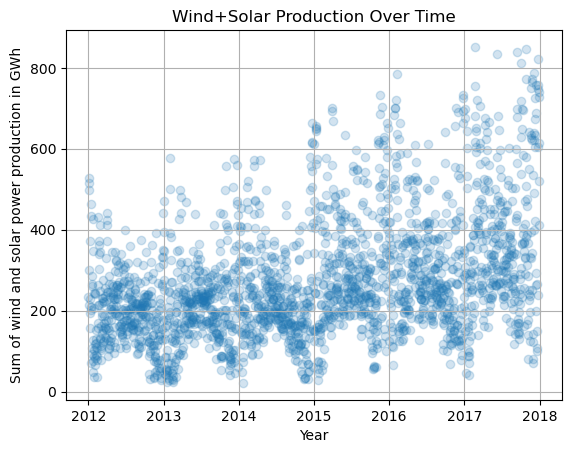

In [15]:
x = df.index
y = df['Wind+Solar']
plt.scatter(x,y,alpha=.2)
plt.grid()
plt.title("Wind+Solar Production Over Time")
plt.xlabel("Year")
plt.ylabel("Sum of wind and solar power production in GWh")
plt.show()

The graph shows the sum of both wind and solar power production (in GWh) from the start of 2012 to the end of 2017. Wind and solar power electricity production appears to increase over time. There appears to be a pattern with the production amounts across the years: it starts low, peaks around halfway through the year, then decreases to a, typically, higher value than the initial point (i.e. similar to a negative parabola).

### Variability over 2017

#### Overall Consumption Over Time

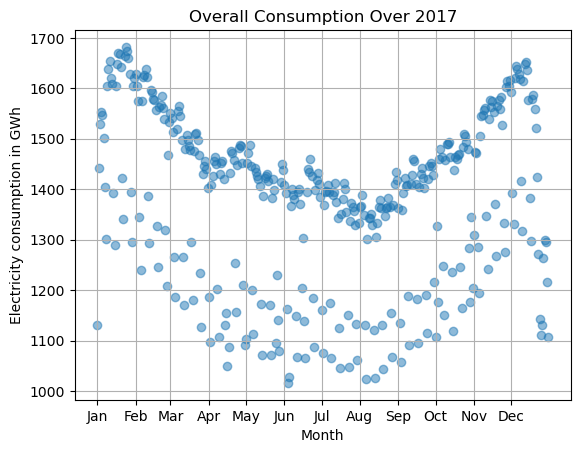

In [16]:
df2017 = df[df.index.year == 2017]
x = df2017.index
y = df2017['Consumption']
plt.scatter(x,y,alpha=.5)
plt.grid()
plt.title("Overall Consumption Over 2017")
plt.xlabel("Month")
plt.ylabel("Electricity consumption in GWh")
# Choose tick positions (1st of each month)
xticks = df2017.resample('MS').first().index  # 'MS' = month start
xticklabels = [d.strftime('%b') for d in xticks]  # '%b' = abbreviated month name
plt.xticks(ticks=xticks, labels=xticklabels)
plt.show()

The graph shows overall electricity consumption (in GWh) over 2017. The consumption over time appears to be in the shape of a parabola. That is, it starts at a peak, decreases to a low point, then increases back to another peak of similar value to the starting point. There is a cluster of data that more closely follows this relationship, which is the greater values of electricity consumption. The smaller values follow the trend as well, but with less strength.

#### Wind and Solar Production Over Time

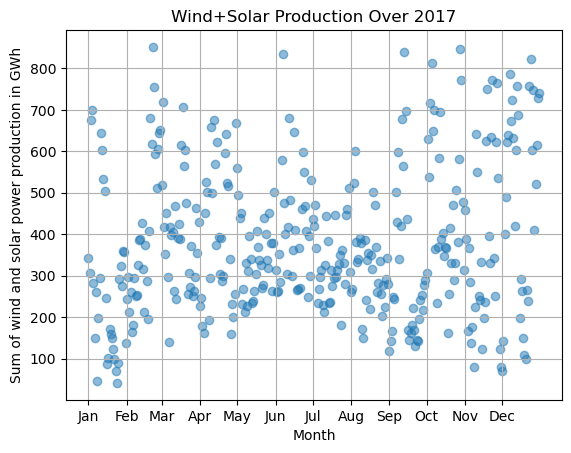

In [17]:
df2017 = df[df.index.year == 2017]
x = df2017.index
y = df2017['Wind+Solar']
plt.scatter(x,y,alpha=.5)
plt.grid()
plt.title("Wind+Solar Production Over 2017")
plt.xlabel("Month")
plt.ylabel("Sum of wind and solar power production in GWh")
# Choose tick positions (1st of each month)
xticks = df2017.resample('MS').first().index  # 'MS' = month start
xticklabels = [d.strftime('%b') for d in xticks]  # '%b' = abbreviated month name
plt.xticks(ticks=xticks, labels=xticklabels)
plt.show()

The graph shows the sum of wind and solar power production (in GWh) over 2017. The production over time appears to be in the shape of a negative parabola. That is, it starts at a low point, increases to a peak, then decreases back to another low point that is slightly greater than the intial point. The relationship is most evident with the smaller elecricity production amounts, which sort of acts as a lower bound of electricity production. Electricity productions greater than this cluster tend to have more variability, with infrequent large electricity production amounts being found towards the start and end of 2017 (which we already established as low points).

### Variability over December 2017

#### Overall Consumption Over Time

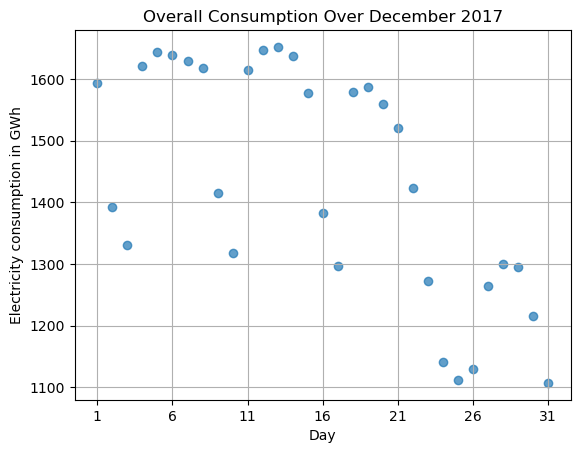

In [18]:
dfDec2017 = df[(df.index.year == 2017) & (df.index.month == 12)]
x = dfDec2017.index
y = dfDec2017['Consumption']
plt.scatter(x,y,alpha=.7)
plt.grid()
plt.title("Overall Consumption Over December 2017")
plt.xlabel("Day")
plt.ylabel("Electricity consumption in GWh")
# Manually set xtick labels to every 5 days
plt.xticks(ticks=x[::5], labels=x[::5].day)
plt.show()

The graph shows overall electricity consumption (in GWh) over December 2017. The consumption over time appears to be decreasing, almost in the shape of a negative exponential growth. There are possibly two clusters converging, as there is a group starting around 1600 GWh and a group starting around 1400 GWh. Around December 25th, they potentially combine groups and converge.

#### Wind and Solar Production Over Time

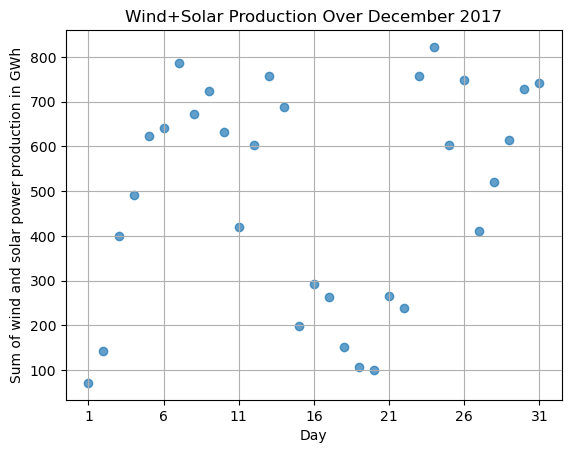

In [19]:
dfDec2017 = df[(df.index.year == 2017) & (df.index.month == 12)]
x = dfDec2017.index
y = dfDec2017['Wind+Solar']
plt.scatter(x,y,alpha=.7)
plt.grid()
plt.title("Wind+Solar Production Over December 2017")
plt.xlabel("Day")
plt.ylabel("Sum of wind and solar power production in GWh")
# Manually set xtick labels to every 5 days
plt.xticks(ticks=x[::5], labels=x[::5].day)
plt.show()

The graph shows the sum of wind and solar power production (in GWh) over December 2017. A potential trend in the electricity production over time is that it starts low, increases to a peak around day 8, decreases to a low point around day 20, and finally increases until the end of the month. However, this trend is not very strong.

## Further Exploration

### How does seasonality effect the energy consumption?

In [20]:
fig = px.box(df,
             x='Month',
             y='Consumption',
             color='Season',
             color_discrete_map={'Winter':'#007ea8','Spring':'#4c7200','Summer':'#dede00','Autumn':'#c76300'},
             title="Overall Consumption By Month (2006-2017)")

fig.update_layout(xaxis_title="Month",
                 yaxis_title="Electricity consumption in GWh")
fig.update_traces(width=.5)

fig.show()

The graph shows the overall consumption in GWh by month across 2006-2017. It is colored by season. The median and upper fences of electricity consumption appear to have a parabolic trend over the months. That is, they start high in January, decreasing to a low point during the summer months, then icnreases back to a peak in December. This suggests an elevated level of electricity consumption during the winter months and a decreased level during the summer months. The spring and autumnm months act as transitionary periods between the high and low levels. The lower fences appear to follow a similar parabolic trend, but January and December have decreased lower fences relative to their neighboring months. The lower fences could potentially have two negative parabolic trends: one from January to June and one from July to December.

### How does the day of the week change energy consumption?

In [21]:
fig = px.box(df,
             x='Weekday Name',
             y='Consumption',
             title="Overall Consumption By Day of the Week (2006-2017)")

fig.update_layout(xaxis_title="Day of the Week",
                 yaxis_title="Electricity consumption in GWh")

fig.show()

The graph shows the overall consumption in GWh by day of the week across 2006-2017. All descriptive statistics shown in the box plot appear to have a negative parabolic trend. That is, there is low electricity consumption on Sunday, which increases to a peak on Wednesday, then decreases to a low point on Saturday. This trend seems to be rather shallow because the electricity consumption amounts for weekdays (Mon-Fri) are relatively similar. Overall, Sunday typically has the smallest electricity consumption and Wednesday has the highest.

### Daily and average weekly production for both solar and wind.

In [22]:
# create df downsampled to be average weekly data
dfWeekly = df['Wind+Solar'][df['Wind+Solar'].isna()==False].resample('W').mean()
dfWeekly

Date
2012-01-01    234.052000
2012-01-08    379.510571
2012-01-15    247.139857
2012-01-22    255.454714
2012-01-29    103.065000
                 ...    
2017-12-03    302.655143
2017-12-10    652.955000
2017-12-17    460.675571
2017-12-24    348.913571
2017-12-31    623.939286
Freq: W-SUN, Name: Wind+Solar, Length: 314, dtype: float64

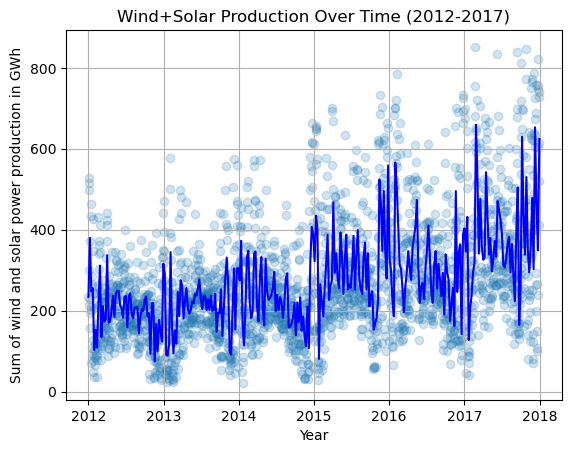

In [23]:
y1 = df['Wind+Solar'][df['Wind+Solar'].isna()==False]
y2 = dfWeekly
plt.scatter(y1.index,y1,alpha=.2)
plt.plot(y2.index,y2,color='blue')
plt.grid()
plt.title("Wind+Solar Production Over Time (2012-2017)")
plt.xlabel("Year")
plt.ylabel("Sum of wind and solar power production in GWh")
plt.show()

The graph shows the sum of both wind and solar power production (in GWh) from the start of 2012 to the end of 2017. The dark blue line is the weekly average of electricity production and the lighter blue points are the specific values for each day. There appears to be an overall increase of wind and solar power electricity production from 2012 to 2018, with similar production trends within each year that we have already analyzed. The majority of the daily data is found near the weekly averages, although there are some daily data points that have much greater electricity production than the weekly average.

### Using downsampling plot the yearly rolling average of both wind and solar consumption.

In [24]:
# create df downsampled to be average yearly data
dfYearly = df['Wind+Solar'][df['Wind+Solar'].isna()==False].resample('YE').mean()
dfYearly

Date
2012-12-31    201.502730
2013-12-31    211.287722
2014-12-31    230.305254
2015-12-31    307.879814
2016-12-31    304.838661
2017-12-31    379.589063
Freq: YE-DEC, Name: Wind+Solar, dtype: float64

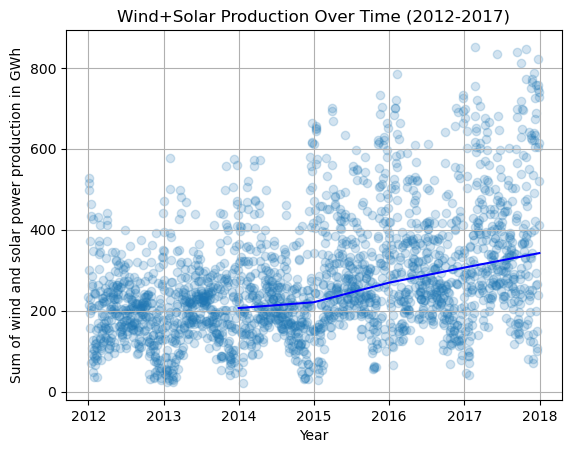

In [25]:
y1 = df['Wind+Solar'][df['Wind+Solar'].isna()==False]
y2 = dfYearly.rolling(2).mean()
plt.scatter(y1.index,y1,alpha=.2)
plt.plot(y2.index,y2,color='blue')
plt.grid()
plt.title("Wind+Solar Production Over Time (2012-2017)")
plt.xlabel("Year")
plt.ylabel("Sum of wind and solar power production in GWh")
plt.show()

The graph shows the sum of both wind and solar power production (in GWh) from the start of 2012 to the end of 2017. The dark blue line is the yearly average of electricity production and the lighter blue points are the specific values for each day. There appears to be an overall increase of wind and solar power electricity production from 2012 to 2018. The visual suggests 2015 was the year where solar and wind elecricity production began increasing at a faster rate.

## Conclusion

The data spans from the start of 2012 to the end of 2017. Across this time span, it appears that the overall electricity increases slightly and the wind and solar production increases more rapidly. There appeared to be yearly trends, so we analyzed 2017 as an example. Over 2017, electricity consumption seemed to follow a parabolic trend, with potential two clusters starting at different consumption levels. Wind and solar production over 2017 appeared to follow a negative parabolic trend. Additionally, there appeared to be monthly trends, so we analyzed December 2017 as an example. Across December 2017, overall consumption tended to decrease while wind and solar power production did not have a strong monthly trend. Furthermore, energy consumption appears to be elevated the winter and decreased in the summer, with spring and autumn being transition periods for the levels. Weekdays tend to have higher electricity consumption levels, while Saturday has a lower level and Sunday typically has the lowest electricity consumption. In conclusion, the data reveals trends of electricity consumption and production from 2012-2017.